Import all the important library needed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold


import the dataset and display the first 5 records of the daataset

In [3]:
df = pd.read_csv('yacht_hydro.csv')
df.head()

,LC,PC,L/D,B/Dr,L/B,Fr,Rr
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


As we can see that following attribute information <br>

1.Longitudinal position of the center of buoyancy [LC], adimensional. <br>
2.Prismatic coefficient [PC], adimensional.<br>
3.Length-displacement ratio [L/D], adimensional.<br>
4.Beam-draught ratio [B/Dr], adimensional.<br>
5.Length-beam ratio [L/B], adimensional.<br>
6.Froude number [Fr], adimensional.<br>

The measured variable is the residuary resistance per unit weight of displacement:<br>

1.Residuary resistance per unit weight of displacement [Rr], adimensional.<br>

Prediction of residuary resistance of sailing yachts at the initial design stage is of a great value for evaluating the shipâ€™s performance and for estimating the required propulsive power.<br>

So Here our intention is to predict Rr From given data.


In [4]:
df.shape

(308, 7)

The Delft data set comprises 308 full-scale experiments, which were performed at the Delft Ship Hydromechanics Laboratory for that purpose.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LC      308 non-null    float64
 1   PC      308 non-null    float64
 2   L/D     308 non-null    float64
 3   B/Dr    308 non-null    float64
 4   L/B     308 non-null    float64
 5   Fr      308 non-null    float64
 6   Rr      308 non-null    float64
dtypes: float64(7)
memory usage: 17.0 KB


In [6]:
df.isnull().sum()

LC      0
PC      0
L/D     0
B/Dr    0
L/B     0
Fr      0
Rr      0
dtype: int64

As we can observe following dataset does not contains any missing values.

# Target Setting

In [7]:
target = ['Rr']
dataY = df[target]
dataX = df.drop(target, axis=1)

In [8]:
df_columns = list(dataX.columns)
print(df_columns)

['LC', 'PC', 'L/D', 'B/Dr', 'L/B', 'Fr']


Now, <br>
dataX - contains all the columns except the target column <br>
dataY - contains the target column

In [9]:
dataX = np.array(dataX)
dataY = np.array(dataY)

In [10]:
lengthOfX = len(dataX)
print(lengthOfX)

M = list(range(lengthOfX))
random.seed(2021)
random.shuffle(M)

308


In [11]:
trainX=dataX[M[0:(lengthOfX//4)*3]]
trainY=dataY[M[0:(lengthOfX//4)*3]]
testX=dataX[M[(lengthOfX//4)*3:]]
testY=dataY[M[(lengthOfX//4)*3:]]

This code splits the input data and corresponding labels into training and testing sets using a random shuffle. The division is such that 75% of the data is used for training and 25% for testing.  <br>

So, after this code is executed, the trainX and trainY arrays will contain 75% of the shuffled input data and labels, respectively, while the testX and testY arrays will contain the remaining 25%. These arrays can be used to train and evaluate a machine learning model


In [12]:
print(len(trainX))
print(len(testX))

231
77


In [13]:
train_df = pd.DataFrame(trainX)
test_df = pd.DataFrame(testX)

In [14]:
train_df.columns = df_columns
test_df.columns = df_columns

In [15]:
def create_numeric_feature(input_df):
    use_columns = df_columns
    return input_df[use_columns].copy()

In [16]:
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [17]:
# from tqdm import tqdm

# def to_feature(input_df):

#     processors = [
#         create_numeric_feature,
#     ]
    
#     out_df = pd.DataFrame()
    
#     for func in tqdm(processors, total=len(processors)):
#         with Timer(prefix='create' + func.__name__ + ' '):
#             _df = func(input_df)

#         assert len(_df) == len(input_df), func.__name__
#         out_df = pd.concat([out_df, _df], axis=1)
        
#     return out_df

In [18]:
# train_feat_df = to_feature(train_df)
# test_feat_df = to_feature(test_df)

So, the create_numeric_feature function creates a new DataFrame containing only a subset of columns specified in df_columns, which are assumed to be numeric features. This function can be used as a preprocessing step for machine learning models that require a subset of the columns in the input data to be numeric features.

# Data Visulization

In [19]:
df.describe()

,LC,PC,L/D,B/Dr,L/B,Fr,Rr
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


<Axes: >

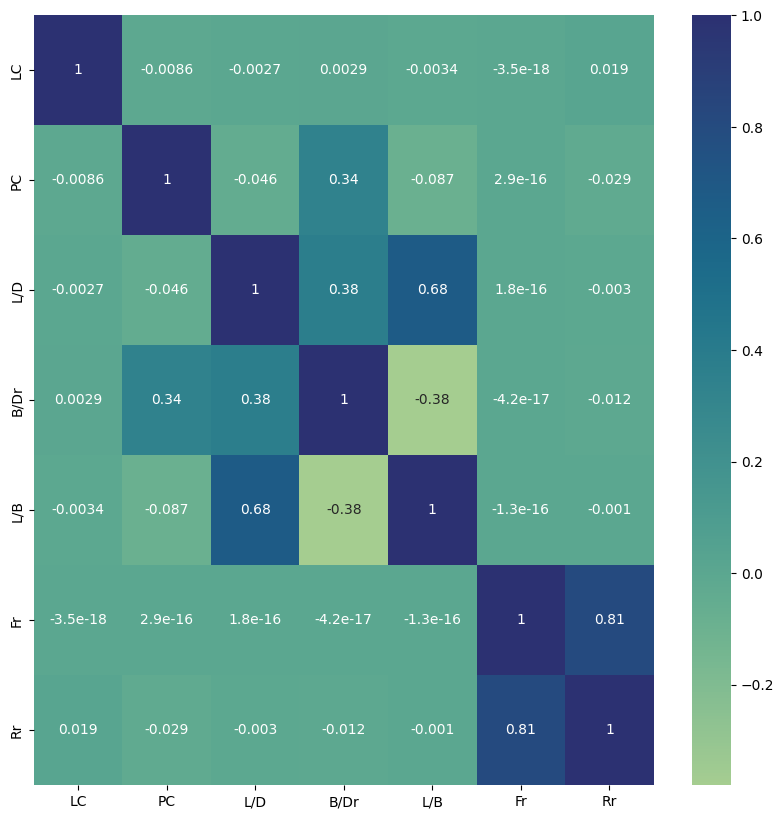

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='crest')

In [21]:
def visualize_feature_importance(models, feature_train_df):
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        model_df = pd.DataFrame()
        model_df['feature_importance'] = model.feature_importances_
        model_df['column'] = feature_train_df.columns
        model_df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, model_df], 
                                          axis=0, ignore_index=True)

    top_features = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]
    
    print("Top 5 features: ", top_features[0:5].tolist())

    fig, ax = plt.subplots(figsize=(8, max(6, len(top_features) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=top_features, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    
    ax.tick_params(axis='x', rotation=0)
    #ax.set_title('Feature Importance')
    ax.grid()
    fig.tight_layout()
    
    return fig, ax


In [22]:
# for target_index in range(1):
#     fold = KFold(n_splits=5, shuffle=True, random_state=71)
#     target_df = ydf.iloc[:,target_index]
#     target_values = np.array(target_df)
#     cv_splits = list(fold.split(train_feat_df, target_values))
#     oof_predictions, trained_models = fit_lgbm(train_feat_df.values, target_values, cv_splits, params=params, verbose=500)
#     fig, ax = visualize_feature_importance(trained_models, train_feat_df)
#     ax.set_title(target[target_index] + ' Importance', fontsize=20)


In [23]:
orders=['Fr', 'B/Dr', 'PC', 'L/D', 'L/B']
target=['Rr']

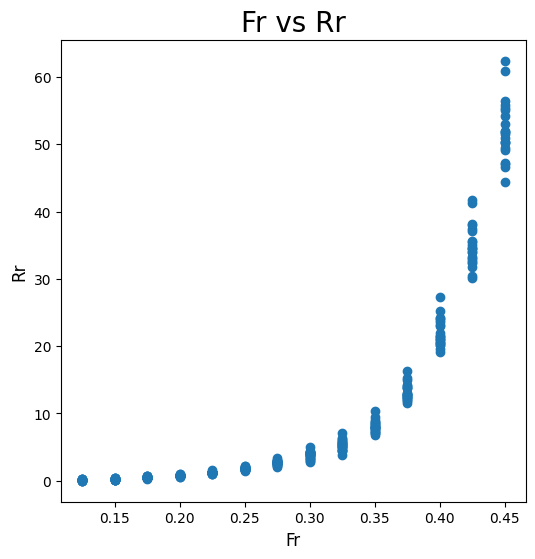

In [24]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title(orders[0]+' vs '+target[0],fontsize=20)
ax.set_ylabel(target[0],fontsize=12)
ax.set_xlabel(orders[0],fontsize=12)
ax.scatter(df[orders[0]],df[target[0]],)

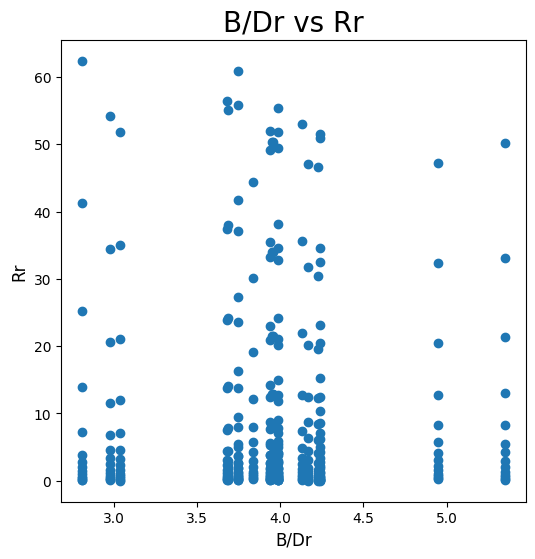

In [25]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title(orders[1]+' vs '+target[0],fontsize=20)
ax.set_ylabel(target[0],fontsize=12)
ax.set_xlabel(orders[1],fontsize=12)
ax.scatter(df[orders[1]],df[target[0]],)

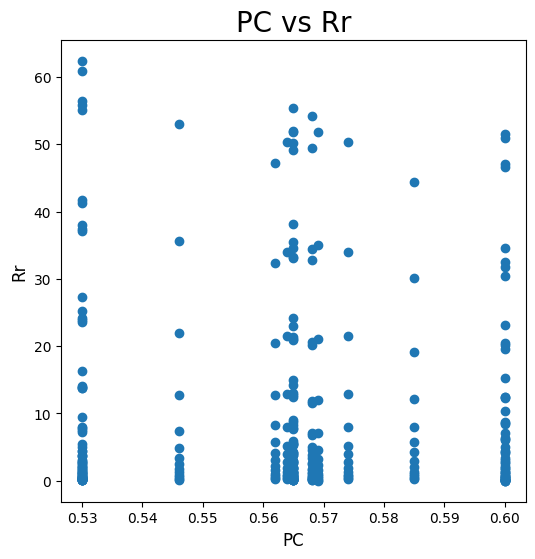

In [26]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title(orders[2]+' vs '+target[0],fontsize=20)
ax.set_ylabel(target[0],fontsize=12)
ax.set_xlabel(orders[2],fontsize=12)
ax.scatter(df[orders[2]],df[target[0]],)

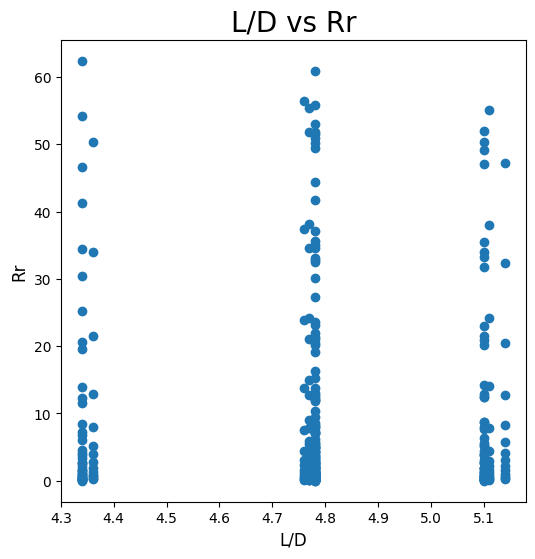

In [27]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title(orders[3]+' vs '+target[0],fontsize=20)
ax.set_ylabel(target[0],fontsize=12)
ax.set_xlabel(orders[3],fontsize=12)
ax.scatter(df[orders[3]],df[target[0]],)

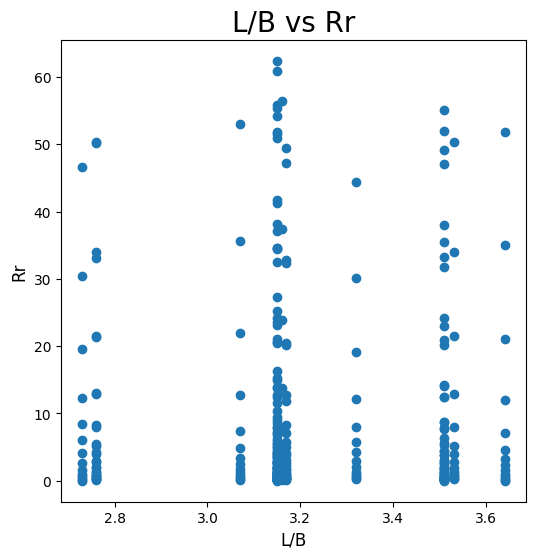

In [28]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title(orders[4]+' vs '+target[0],fontsize=20)
ax.set_ylabel(target[0],fontsize=12)
ax.set_xlabel(orders[4],fontsize=12)
ax.scatter(df[orders[4]],df[target[0]],)

In [32]:

scaler = StandardScaler()
x_train = scaler.fit_transform(trainX)


In [33]:
regression = LinearRegression()
regression.fit(x_train,trainY)

LinearRegression()

In [34]:
regression.coef_

array([[-0.10324803, -1.24366398,  0.42812337,  0.04579454, -0.04374475,
        12.4048893 ]])

In [50]:
regression_pred = regression.predict(testX)

In [51]:
regression_pred[1]

array([15.1255352])

In [52]:
regression_pred_df = pd.DataFrame(regression_pred,columns=["Predicted"])
regression_pred_df.head()

,Predicted
0,15.711957
1,15.125535
2,18.078115
3,17.631854
4,14.715957


In [53]:
regression.score(testX,testY)

-0.06632798176680499